In [1]:
from llama_index.llms.ollama import Ollama

/home/tung/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mm_model = Ollama(model="llama3")

In [3]:
!pip install matplotlib
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!ls

cam-nang-du-lich-da-lat-dinh-bao-dai.jpg
cam-nang-du-lich-da-lat-quang-truong-lam-vien.jpg
nxJXFmjt-da-lat.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-6.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-2-e1527223341126.jpg
leng-keng-homestay-dalat-3.jpg
cam-nang-du-lich-da-lat-ga-da-lat-2.jpg
cam-nang-du-lich-da-lat-doi-che-cau-dat.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-18.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-25.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-17.jpg
cam-nang-du-lich-da-lat-nha-thieu-nhi-da-lat-3.jpg
cam-nang-du-lich-da-lat-arapang-3-hotel.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-35.jpg
cam-nang-du-lich-da-lat-ho-xuong-huong.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-26.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-27.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-28.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-1.jpg
tron-bo-cam-nang-du-lich-da-lat-a-z-22.jpg
cam-nang-du-lich-da-lat-thac-pongour.jpg
cam-nang-du-lich-da-lat-chua-ve-chai-chua-linh-phuoc-2.jpg
ho-tuyen-lam-da-lat-cover.jpg
tron-bo-cam-nang-du-l

ValueError: num must be an integer with 1 <= num <= 6, not 7

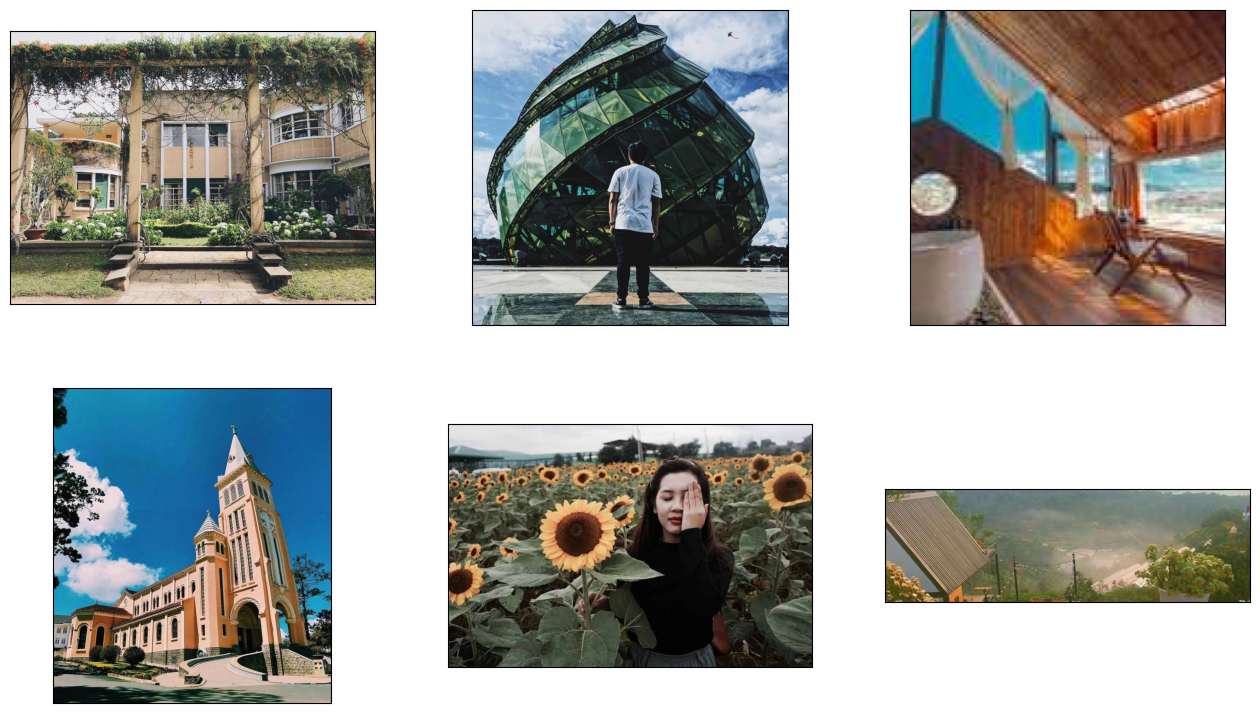

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil


image_paths = []
# for img_path in os.listdir("./Cẩm nang du lịch Phan Thiết 2024 từ A-Z_ đi lại, ăn chơi, lưu trú... mới nhất_files"):
#     image_paths.append(str(os.path.join("Cẩm nang du lịch Phan Thiết 2024 từ A-Z_ đi lại, ăn chơi, lưu trú... mới nhất_files", img_path)))
import glob, os

for file in os.listdir("./Data//dalat/"):
    if file.endswith(".jpg"):
        print(file)
        image_paths.append(str(os.path.join("./Data//dalat/",file)))
        shutil.copyfile(os.path.join("./Data//dalat/",file), os.path.join("./Data//dalat_img/",file))

# # 2nd option
# shutil.copy(src, dst) 
def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [2]:
from llama_index.core import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./Data//phanthiet_img//").load_data()


response_1 = mm_model.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

print(response_1)

NameError: name 'mm_model' is not defined

In [ ]:
print(image_documents)

In [38]:
image_documents = SimpleDirectoryReader("./Data").load_data()

In [39]:
print(image_documents[0])

Doc ID: bf78a9c0-9222-45c4-8835-29c97519a5e1
Text: <!DOCTYPE html> <!-- saved from
url=(0080)https://www.traveloka.com/vi-vn/explore/destination/khu-du-
lich-bau-trang/210245 --> <html style="height:100%" lang="vi-vn"><head
nonce="" crossorigin="anonymous"><meta http-equiv="Content-Type"
content="text/html; charset=UTF-8"><meta name="viewport"
content="width=device-width"><link rel="alternate" me...


In [27]:
from llama_index.readers.web import SimpleWebPageReader
documents = SimpleWebPageReader(html_to_text=True).load_data(
    ["https://vnexpress.net/cam-nang-du-lich-phan-thiet-4582529.html",
    "https://www.traveloka.com/vi-vn/explore/activities/cam-nang-du-lich-vung-tau-tu-a-z/57902",
    "https://www.traveloka.com/vi-vn/explore/destination/kinh-nghiem-du-lich-da-lat/57861",
    "https://www.traveloka.com/vi-vn/explore/destination/khu-du-lich-bau-trang/210245"
    ]
)

In [ ]:
print(documents)

In [34]:
response_2 = mm_model.complete(
    prompt="Can you tell me what is the price with each spec?",
    image_documents=image_documents,
)

print(response_2)

No images found for Wikipedia page: Ford Mustang
No images found for Wikipedia page: Kia EV6
No images found for Wikipedia page: Porsche Taycan
No images found for Wikipedia page: Rivian
No images found for Wikipedia page: Tesla Model S
No images found for Wikipedia page: Tesla Model Y
No images found for Wikipedia page: Polestar
No images found for Wikipedia page: Audi e-tron
No images found for Wikipedia page: BMW i3
No images found for Wikipedia page: Tesla Model 3
No images found for Wikipedia page: Tesla Model X


In [3]:

from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
import chromadb

from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

# set defalut text and image embedding functions
embedding_function = OpenCLIPEmbeddingFunction()
# from llama_index.embeddings.clip import ClipEmbedding
# image_embed_model = ClipEmbedding()



In [4]:
from chromadb.utils.data_loaders import ImageLoader
image_loader = ImageLoader()
chroma_client = chromadb.EphemeralClient()
chroma_collection = chroma_client.create_collection(
    "multimodal_collection354",
    embedding_function=embedding_function,
    data_loader=image_loader,
)

In [36]:
# load documents
import chromadb
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import SimpleDirectoryReader, StorageContext
from chromadb.utils.data_loaders import ImageLoader

documents = SimpleDirectoryReader("./Data/").load_data()

# set up ChromaVectorStore and load in data
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
    embed_model='local'
)

In [7]:
import chromadb
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import SimpleDirectoryReader, StorageContext
from chromadb.utils.data_loaders import ImageLoader

db = chromadb.PersistentClient(path="./chroma_db")
chroma_collection = db.get_or_create_collection("quickstart")
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_vector_store(
    vector_store,
    embed_model='local',
)

In [31]:

# load documents
import chromadb
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import SimpleDirectoryReader, StorageContext
from chromadb.utils.data_loaders import ImageLoader
# load from disk
db2 = chromadb.PersistentClient(path="./chroma_db")
chroma_collection = db2.get_or_create_collection("quickstart")
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)


In [8]:

retriever = index.as_retriever(similarity_top_k=50)
retrieval_results = retriever.retrieve("phan thiet")

**Node ID:** 84509703-91b5-47d4-9fe9-9ae0a5f58b37<br>**Similarity:** 0.8305003186922653<br>**Text:** Phan Thiet is one of Vietnam’s busiest coastal towns. Because it offers a number of unique attrac...<br>

**Node ID:** 5d329b58-1be3-42d1-83e7-effbcc1b0259<br>**Similarity:** 0.7694604305595475<br>**Text:** Photographers find its breathtaking landscape of red, white, and pink especially photo-worthy. Th...<br>

**Node ID:** 4546d17b-eef8-464c-b654-1ed3f6099257<br>**Similarity:** 0.7649409677336471<br>**Text:** Ảnh: <i>Crislove97</i>
</figcaption></figure></div>
</div>
<div class="section-inner inset-column...<br>

**Node ID:** 71095d9e-a54d-4dd8-b958-699465a4dd0f<br>**Similarity:** 0.7619256377742006<br>**Text:** Ảnh: Việt Quốc</div></div>
</div>
</div>
</div>
<figcaption>Công viên biển Đồi Dương (trái) và Th...<br>

**Node ID:** 34438230-8096-412c-8bf8-79855383c055<br>**Similarity:** 0.7560256656911348<br>**Text:** Nước chấm bánh tráng là mắm ruốc, thường được cho thêm ớt tươi băm nhỏ và vắt thêm chanh
rồi đánh...<br>

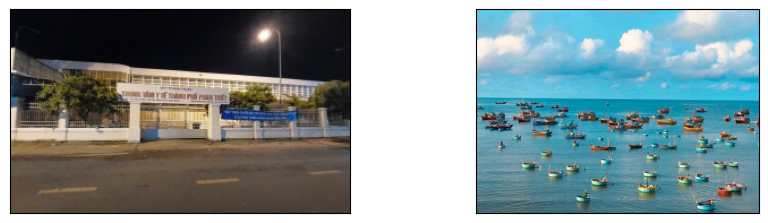

In [9]:
# print(retrieval_results)
from llama_index.core.schema import ImageNode
from llama_index.core.response.notebook_utils import (
    display_source_node,
    display_image_uris,
)


image_results = []
MAX_RES = 5
cnt = 0
for r in retrieval_results:
    if isinstance(r.node, ImageNode):
        image_results.append(r.node.metadata["file_path"])
    else:
        if cnt < MAX_RES:
            display_source_node(r)
        cnt += 1

display_image_uris(image_results, [3, 3], top_k=2)

In [11]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "You act as a tour guide for a Vietnamese tour company\n"
    "You should optimize the traveling fee for customer\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    # multi_modal_llm=mm_model,
    llm = mm_model,
    text_qa_template=qa_tmpl,
    similarity_top_k=2,
    image_similarity_top_k=1,
)



query_str = "where do i go if i want to play  with sand dune"
response = query_engine.query(query_str)

In [12]:
print(response)

My friend!

If you're looking for an adventure with sand dunes, I've got just the place for you! Have you heard of Bau Trang lake? It's located in Hoa Thang Commune, Bac Binh District, in Binh Thuan Province. This unique destination is known for its surreal desert terrain, complete with undulating sand dunes and shimmering waters.

Imagine riding a quad bike or even just hiking up the dunes to take in the breathtaking views. Or, if you're feeling adventurous, try sandboarding or sledding down the slopes! It's an exhilarating experience that will leave you grinning from ear to ear.

And don't forget to bring your camera, as the scenery is simply stunning! You can even rent a boat and glide across the water lilies for a romantic experience. Or, if you're feeling competitive, try fishing in the lakes – there are plenty of freshwater fish species to catch!

To make it an unforgettable trip, I recommend visiting during sunrise or sunset when the light reflects off the dunes and waters, maki

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import os


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(3, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break




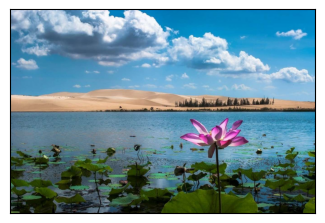

In [19]:

input_image = "./Data/bautrang_img/khu-du-lich-bao-trang-3.jpg"
plot_images([input_image])

In [20]:
# generate Text retrieval results
retriever_engine = index.as_retriever(image_similarity_top_k=4)
# retrieve more information from the GPT4V response
retrieval_results = retriever_engine.image_to_image_retrieve(
    "./Data/bautrang_img/khu-du-lich-bao-trang-3.jpg"
)
retrieved_images = []
for res in retrieval_results:
    retrieved_images.append(res.node.metadata["file_path"])

# Remove the first retrieved image as it is the input image
# since the input image will gethe highest similarity score
plot_images(retrieved_images[1:])

AttributeError: 'VectorIndexRetriever' object has no attribute 'image_to_image_retrieve'

In [45]:

from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

retrieved_image = []
for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
        retrieved_image.append(res_node.node.metadata["file_path"])
    else:
        display_source_node(res_node, source_length=200)

plot_images(retrieved_image)

NameError: name 'retrieval_results' is not defined

In [22]:

response_3 = mm_model.complete(
    prompt="what are other similar cars?",
    image_documents=image_documents,
)

print(response_3)

 The image you've shared appears to be a screenshot of a menu or catalog displaying various models and specifications for different vehicles. It lists features such as "Battery" (battery capacity), "All-wheel drive," "Range" (driving range), "Weight," "Top speed," "Acceleration" (acceleration time), and other specifications for the vehicle's performance, dimensions, and interior features. The vehicles in question are not visible in this image as it shows a menu with text, but it seems to be a comparison or specification sheet for different models of the same brand or type of car. If you need information on specific car models, I can help you find that information through research. 


In [47]:
from llama_index.core import PromptTemplate
from llama_index.core.query_engine import SimpleMultiModalQueryEngine

qa_tmpl_str = (
    "Context information is below.\n"
    "---------------------\n"
    "{context_str}\n"
    "---------------------\n"
    "Given the context information and not prior knowledge, "
    "answer the query.\n"
    "Query: {query_str}\n"
    "Answer: "
)
qa_tmpl = PromptTemplate(qa_tmpl_str)

query_engine = index.as_query_engine(
    # multi_modal_llm=mm_model,
    llm = mm_model,
    text_qa_template=qa_tmpl,
    similarity_top_k=2,
    image_similarity_top_k=1,
)



query_str = "Tell me more about the Porsche"
response = query_engine.query(query_str)

ValueError: "OllamaMultiModal" object has no field "callback_manager"

In [29]:
print(response)

 The Porsche Taycan is an electric luxury sports sedan and shooting brake car produced by the German automobile manufacturer Porsche. It's the first series production electric car from the brand, offering driving dynamics with electric efficiency. The car features a two-speed transmission for optimal performance and range, which can exceed 321 kilometres (199 mi) depending on the model and driving conditions. The Taycan is available in several variants at different performance levels. It has a retractable rear spoiler, retractable door handles, and an advanced regenerative braking system. The design of the car combines the fundamental short-nosed front proportions of traditional Porsches with the stretched proportions of modern front-engine models towards the rear. The Taycan Turbo and Turbo S models include carbon-fibre trim and 20-inch wheels. There are also different variants of the Taycan, including a Cross Turismo, Sport Turismo, and GTS. The Taycan uses a new battery-electric all

In [30]:
from llama_index.core.prompts import PromptTemplate
from llama_index.core.query_pipeline import QueryPipeline, FnComponent

query_prompt_str = """\
Please expand the initial statement using the provided context from the Tesla 10K report.

{initial_statement}

"""
query_prompt_tmpl = PromptTemplate(query_prompt_str)

# MM model --> query prompt --> query engine
qp = QueryPipeline(
    modules={
        "mm_model": mm_model.as_query_component(
            partial={"image_documents": [image_doc]}
        ),
        "query_prompt": query_prompt_tmpl,
        "query_engine": query_engine,
    },
    verbose=True,
)
qp.add_chain(["mm_model", "query_prompt", "query_engine"])
rag_response = qp.run("Which Tesla Factory is shown in the image?")

NameError: name 'image_doc' is not defined